In [30]:
### K-Means Algorithm Project ###
### Team 9 ###
# 김동훈(21700086)
# 김용우(21800144)
# 박유빈(21900296)
# 박예은(22000282)

In [1]:
from google.colab import drive
drive.mount('/content/drive') # google Drive mount

Mounted at /content/drive


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import copy
import matplotlib.colors as colors

In [3]:
data_path = '/content/drive/MyDrive/기계학습개론/기계학습개론_project/' # data path that contains data files 

### **Task 1: Toy problem**

In [4]:
# main function : K-Means clustering function
def k_means_clustering(points, centroids, max_iterations=100, convergence_threshold=0.0001):
    num_points = points.shape[0]
    num_clusters = centroids.shape[0]
    distances = np.zeros((num_points, num_clusters))
    
    for iteration in range(max_iterations):
        print("# iteration : {}".format(iteration+1))

        # Calculate distances between points and centroids
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(points - centroids[i], axis=1)
        
        # Assign points to the closest centroid
        cluster_assignments = np.argmin(distances, axis=1)
    
        # Print centriods points
        print("centroids :", end=' ')
        for i in range(num_clusters):
            print(centroids[i], end=' ')

        # Update centroids and print new centriods points
        new_centroids = copy.deepcopy(centroids)
        print("\nnew centroids :", end=' ')
        for i in range(num_clusters):
            points_in_cluster = points[cluster_assignments == i]
            if len(points_in_cluster)!=0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
            print(new_centroids[i], end=' ')
        
        # Check convergence
        centroid_diff = np.linalg.norm(new_centroids - centroids)
        print("\ncentroid difference : {}".format(centroid_diff))
        if centroid_diff < convergence_threshold:
            break
        
        centroids = new_centroids
    
    return cluster_assignments, centroids

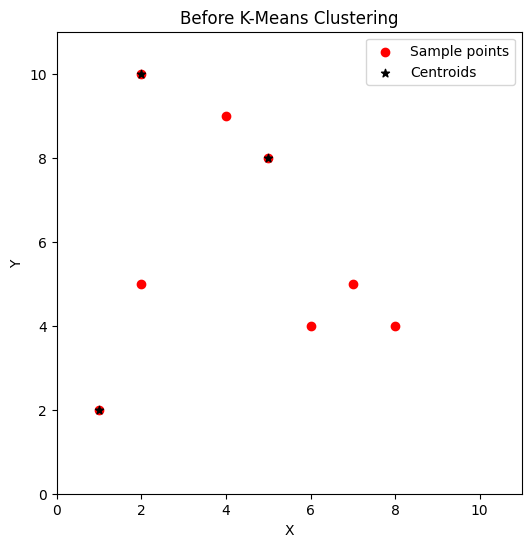

In [5]:
# Given points and centroid initializations
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
initial_centroids = np.array([[2, 10], [5, 8], [1, 2]])

# Plot graph
plt.figure(figsize = (6,6))
plt.scatter(points[:, 0], points[:, 1], c='red', label='Sample points') # Plot the sample points
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='black', marker='*', label='Centroids') # Plot the centroids
plt.title('Before K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 11)  # Set x-axis limits
plt.ylim(0, 11)  # Set y-axis limits
plt.legend()
plt.show()

# iteration : 1
centroids : [ 2 10] [5 8] [1 2] 
new centroids : [ 2 10] [6 6] [1 3] 
centroid difference : 2.449489742783178
# iteration : 2
centroids : [ 2 10] [6 6] [1 3] 
new centroids : [3 9] [6 5] [1 3] 
centroid difference : 1.7320508075688772
# iteration : 3
centroids : [3 9] [6 5] [1 3] 
new centroids : [3 9] [7 4] [1 3] 
centroid difference : 1.4142135623730951
# iteration : 4
centroids : [3 9] [7 4] [1 3] 
new centroids : [3 9] [7 4] [1 3] 
centroid difference : 0.0


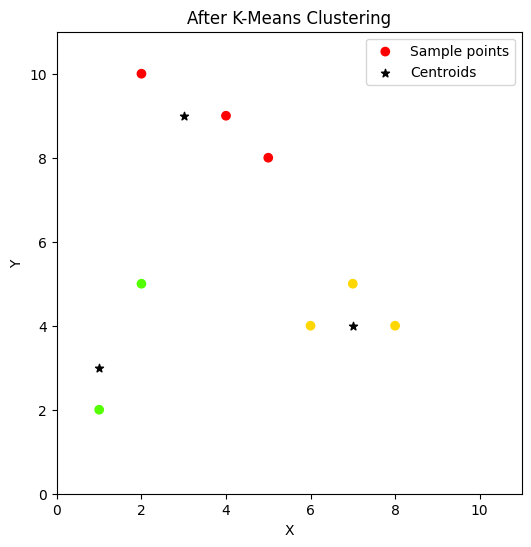

In [6]:
# Perform clustering
cluster_assignments, final_centroids = k_means_clustering(points, initial_centroids)

# Plot graph
plt.figure(figsize = (6,6))
plt.scatter(points[:, 0], points[:, 1], c=cluster_assignments, cmap='prism', label='Sample points') # Plot the sample points
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='*', label='Centroids') # Plot the centroids
plt.title('After K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 11)  # Set x-axis limits
plt.ylim(0, 11)  # Set y-axis limits
plt.legend()
plt.show()

### **Task 2: Open-ended problem**

In [7]:
# Read the data
korean_territory = pd.read_csv(data_path+"South_Korea_territory.csv")
korean_territory

,Longitude (deg),Latitude (deg)
0,128.364919,38.624335
1,128.394784,38.578074
2,128.441417,38.505805
3,128.450694,38.474107
4,128.474457,38.426093
...,...,...
1588,128.276955,38.554056
1589,128.274785,38.571497
1590,128.281089,38.584416
1591,128.308374,38.601340


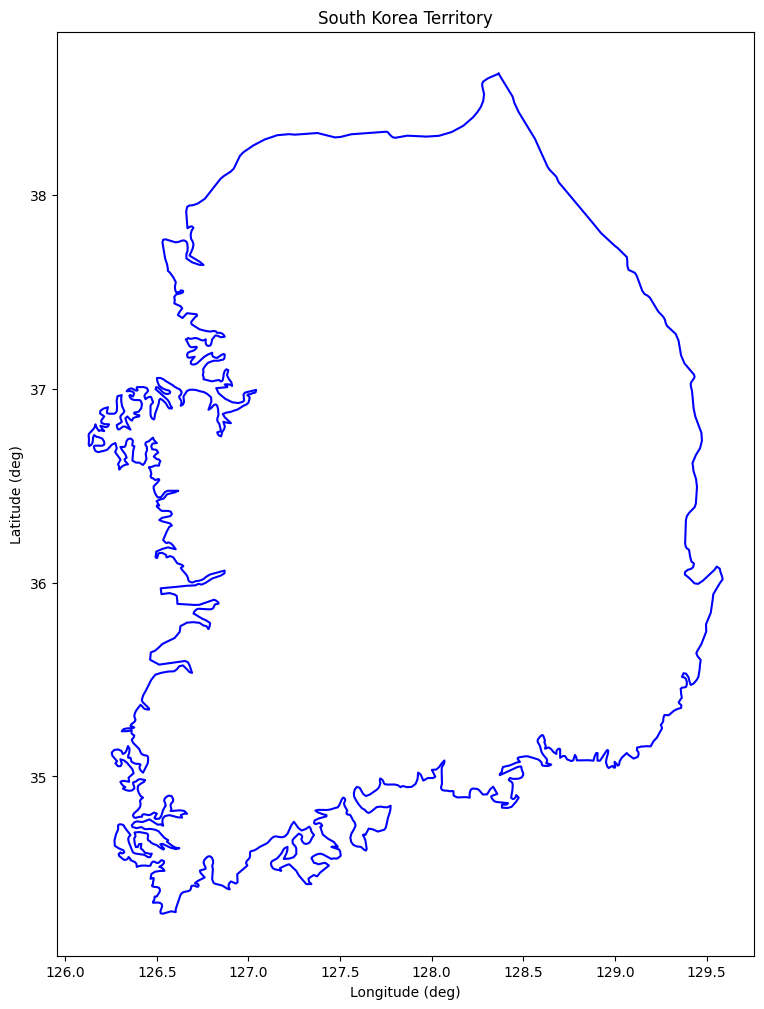

In [8]:
# Plot the territory
plt.figure(figsize = (9,12))
plt.plot(korean_territory['Longitude (deg)'], korean_territory['Latitude (deg)'], c='blue')
plt.title('South Korea Territory')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()

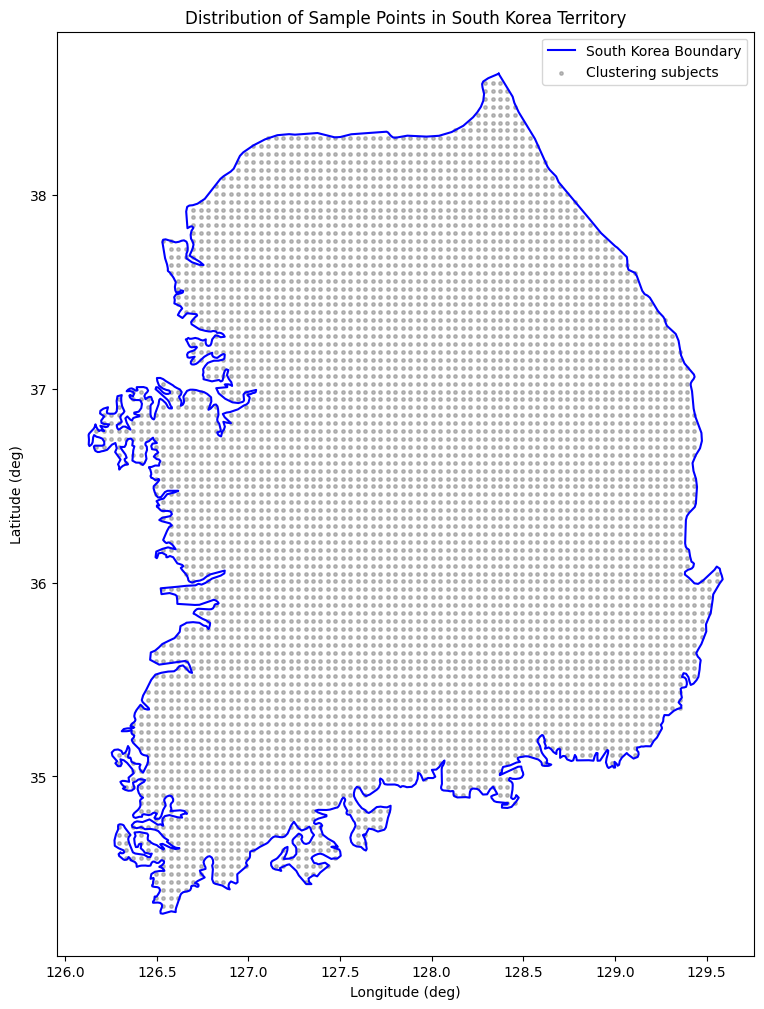

numbers of Clustering subjects is 5666


In [9]:
# Extract latitude and longitude columns
latitude = korean_territory['Latitude (deg)'].values
longitude = korean_territory['Longitude (deg)'].values

# Create a polygon representing South Korea's boundary
polygon = Polygon(zip(longitude, latitude))

# Determine the bounds of latitude and longitude
min_lat, max_lat = np.min(latitude), np.max(latitude)
min_lon, max_lon = np.min(longitude), np.max(longitude)

# Define the parameter of Clustering subjects
num_clustering_subject = 1000

# Calculate the grid size based on the number of sample points
grid_size = np.sqrt((max_lat - min_lat) * (max_lon - min_lon) / num_clustering_subject) / 3

# Generate uniformly distributed sample points within the territory boundary
clustering_subject = []
x = np.arange(min_lon, max_lon, grid_size)
y = np.arange(min_lat, max_lat, grid_size)

for lat in y:
    for lon in x:
        point = Point(lon, lat)
        if polygon.contains(point):
            clustering_subject.append([lat, lon])

clustering_subject = np.array(clustering_subject)

# Plot the territory boundary and sample points
plt.figure(figsize=(9, 12))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary')
plt.scatter(clustering_subject[:, 1], clustering_subject[:, 0], c='gray', alpha=0.5, s=6, label='Clustering subjects')
plt.title('Distribution of Sample Points in South Korea Territory')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.show()
print(f'numbers of Clustering subjects is {len(clustering_subject)}')

# iteration : 1
centroids : [ 35.10831233 128.37243175] [ 35.02670334 127.59714632] [ 34.82268085 127.10749236] [ 35.27153032 127.55634182] [ 35.18992132 126.41381592] [ 35.31233481 128.00519128] [ 35.18992132 129.18852168] [ 34.65946287 126.29140243] [ 35.31233481 127.02588337] [ 35.23072582 126.78105639] [ 35.23072582 127.10749236] [ 35.35313931 128.9436947 ] [ 35.27153032 127.7603643 ] [ 35.3939438  127.92358229] [ 35.18992132 128.12760477] [ 34.82268085 127.63795081] [ 35.10831233 127.59714632] [ 35.18992132 127.18910135] [ 35.02670334 126.69944739] [ 35.23072582 127.59714632] [ 35.18992132 127.96438679] [ 34.65946287 127.06668786] [ 35.35313931 127.31151484] [ 35.06750783 128.16840927] [ 35.35313931 127.35231934] [ 35.31233481 127.10749236] [ 34.98589884 126.94427437] [ 35.14911683 127.51553732] [ 35.23072582 127.31151484] [ 34.86348535 127.47473283] 
new centroids : [ 35.25730489 128.44468191] [ 35.0125787  127.64265902] [ 34.85133082 127.14829685] [ 35.42075819 127.57149778] [ 3

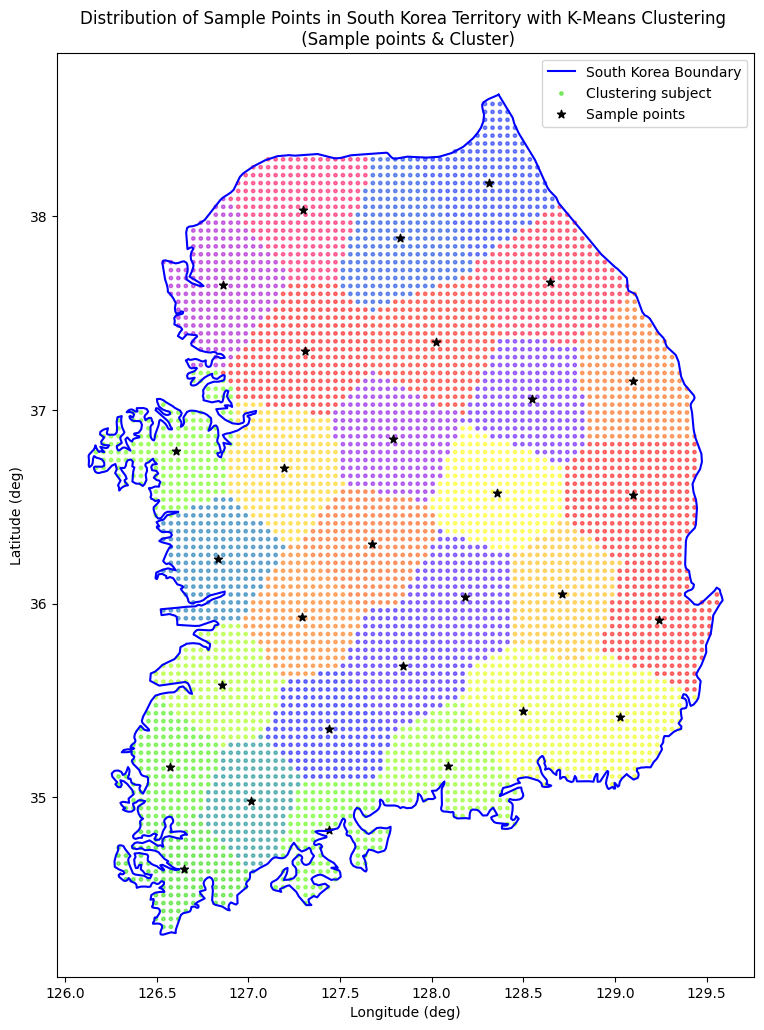

numbers of Sample points is 30


In [10]:
# Define the number of clusters
num_clusters = 30

# Perform K-means clustering on the sample points
initial_centroids = clustering_subject[np.random.choice(range(num_clustering_subject), size=num_clusters, replace=False)]
cluster_assignments, centroids = k_means_clustering(clustering_subject, initial_centroids)

# Plot the territory boundary, sample points, and cluster subjects
plt.figure(figsize=(9, 12))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary')
plt.scatter(clustering_subject[:, 1], clustering_subject[:, 0], c=cluster_assignments, cmap='prism', alpha=0.5, s=6, label='Clustering subject')
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='*', label='Sample points')
plt.title('Distribution of Sample Points in South Korea Territory with K-Means Clustering \n (Sample points & Cluster)')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.show()
print(f'numbers of Sample points is {len(centroids)}')

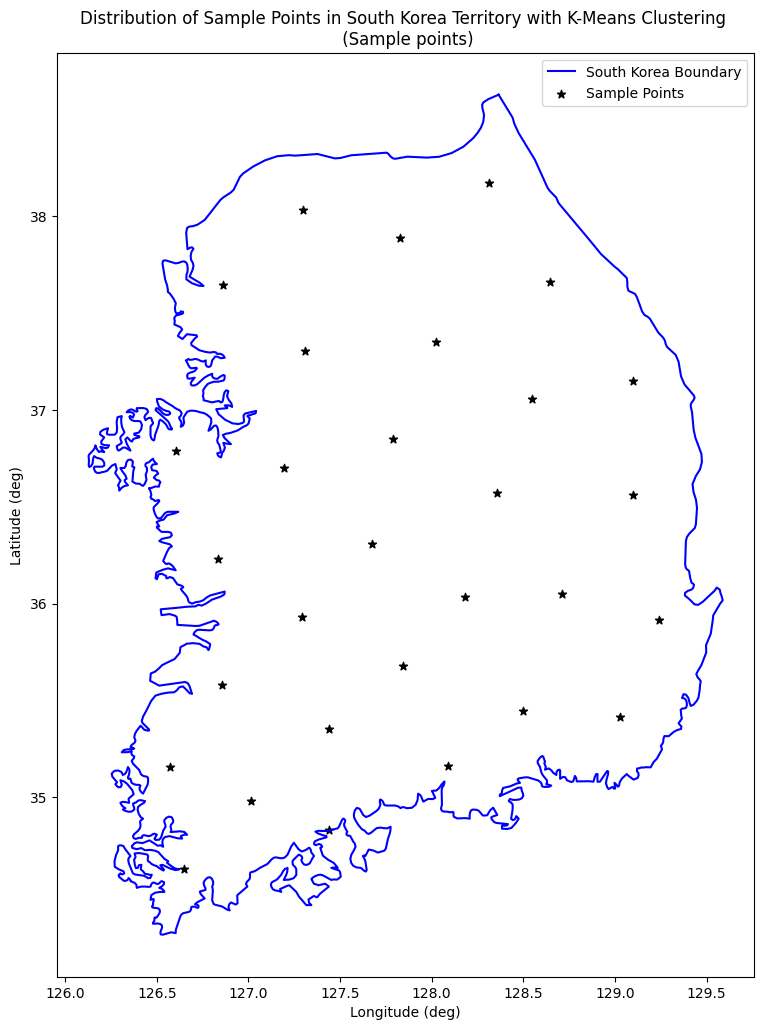

numbers of Sample points is 30


In [11]:
# Plot the territory boundary, sample points
plt.figure(figsize=(9, 12))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary')
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='*', label='Sample Points')
plt.title('Distribution of Sample Points in South Korea Territory with K-Means Clustering \n (Sample points)')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.show()
print(f'numbers of Sample points is {len(centroids)}')

### **Task 3: Real-world problem**

#### 3-1 : Visualize the vertiport candidate locations in the Korean peninsula by using the given files

In [12]:
# Read the data
vertiport_candidates = pd.read_csv(data_path+'Vertiport_candidates.csv')
vertiport_candidates

,Longitude (deg),Latitude (deg)
0,126.940197,37.621876
1,127.096292,37.535756
2,126.939432,37.492020
3,127.033749,37.612760
4,126.839673,37.561111
...,...,...
7769,126.855395,33.423088
7770,126.225025,33.268913
7771,126.397977,33.336998
7772,126.719626,33.291340


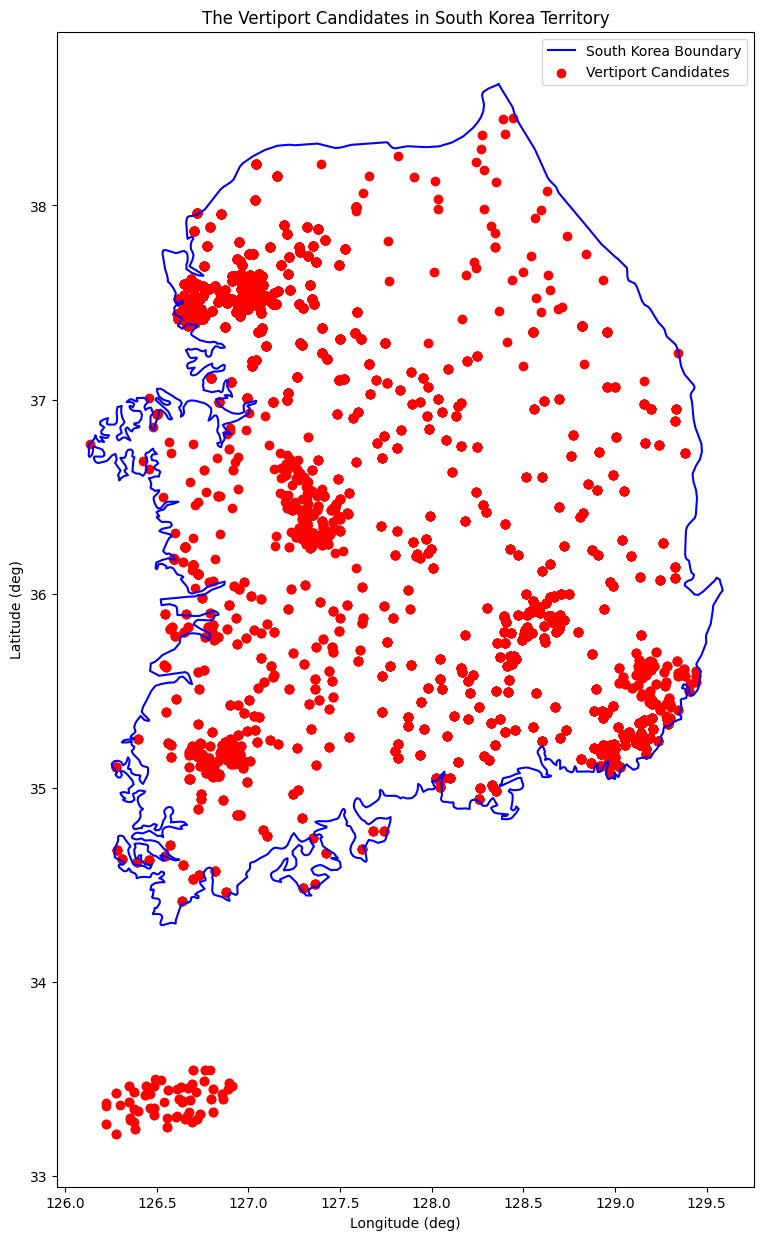

In [13]:
# Extract latitude and longitude columns from the candidates DataFrame
latitude_candidates = vertiport_candidates['Latitude (deg)'].values
longitude_candidates = vertiport_candidates['Longitude (deg)'].values

# Plot the territory boundary and sample points
plt.figure(figsize=(9, 15))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary') # Plot the territory
plt.scatter(longitude_candidates, latitude_candidates, c='red', marker='o', label='Vertiport Candidates') # Plot the sample points
plt.title('The Vertiport Candidates in South Korea Territory')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.show()

#### 3-2 : Let's say that the Korean government allows your team to assign only 17 vertiports in the Korean peninsula

# iteration : 1
centroids : [ 36.2323777  127.99656035] [ 37.45510665 126.6351827 ] [ 37.11194029 126.79565915] [ 37.51921551 127.34724906] [ 37.64334968 127.00981104] [ 36.11723631 128.6037212 ] [ 36.43875481 126.91055449] [ 37.21044256 127.4313608 ] [ 37.62187588 126.94019713] [ 37.41242236 126.61671504] [ 35.227053   126.74361002] [ 35.36221004 127.8720374 ] [ 37.39429671 126.6585347 ] [ 37.98978408 127.58824724] [ 35.3523022  128.37324709] [ 37.5152637  127.03389049] [ 37.64334968 127.00981104] 
new centroids : [ 36.36693684 127.85991601] [ 37.52607774 126.68747832] [ 37.05696847 126.87854441] [ 37.60523509 127.34273897] [ 37.7448731  127.06337468] [ 36.18437396 128.81776055] [ 36.26311838 127.01787928] [ 37.16573762 127.63366896] [ 37.65243798 126.86870422] [ 37.41948917 126.62075337] [ 34.89729162 126.80184372] [ 35.359856   127.76375675] [ 37.42523537 126.72387978] [ 37.92217412 127.57941403] [ 35.30757341 128.83607336] [ 37.48377359 127.04074584] [ 37.64334968 127.00981104] 
ce

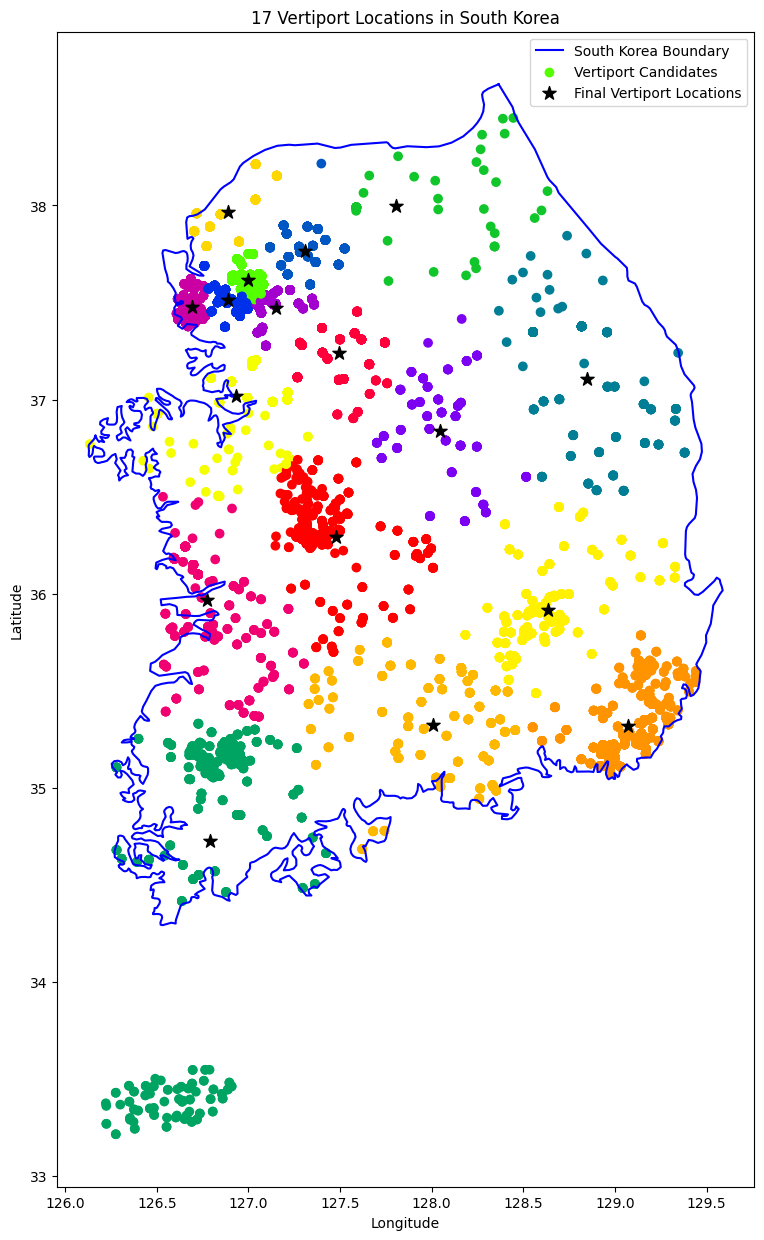

In [14]:
# Prepare the vertiport candidate data for clustering
candidates_data = np.column_stack((latitude_candidates, longitude_candidates))

# 17 vertiports
k = 17 

# Perform K-Means clustering using the k_means_clustering function
initial_centroids = candidates_data[np.random.choice(range(len(candidates_data)), size=k, replace=False)]
cluster_assignments, centroid_points = k_means_clustering(candidates_data, initial_centroids)

# Visualize the territory boundary, vertiport candidate locations, and centroid points
plt.figure(figsize=(9, 15))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary') # Plot the territory
plt.scatter(longitude_candidates, latitude_candidates, c=cluster_assignments, cmap='prism', marker='o', label='Vertiport Candidates') # Plot the sample points
plt.scatter(centroid_points[:, 1], centroid_points[:, 0], c='black', marker='*', s=100, label='Final Vertiport Locations') # Plot the centriods
plt.title('17 Vertiport Locations in South Korea')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### 3-3 : Imagine that the Korean government allows your team to place vertiport as many as your team wants, implying that the government does not have any financial issues

#### 1. Get the initial clustering number from the Elbow Method

In [15]:
# K-Means clustering function without printing texts
def k_means_clustering_without_text(points, centroids, max_iterations=100, convergence_threshold=0.0001):
    num_points = points.shape[0]
    num_clusters = centroids.shape[0]
    distances = np.zeros((num_points, num_clusters))
    
    for iteration in range(max_iterations):
        # Calculate distances between points and centroids
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(points - centroids[i], axis=1)
        
        # Assign points to the closest centroid
        cluster_assignments = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = copy.deepcopy(centroids)
        for i in range(num_clusters):
            points_in_cluster = points[cluster_assignments == i]
            if len(points_in_cluster)!=0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
        
        # Check convergence
        centroid_diff = np.linalg.norm(new_centroids - centroids)
        if centroid_diff < convergence_threshold:
            break
        
        centroids = new_centroids
    
    return cluster_assignments, centroids

In [16]:
# Function that calculates inertia
def calculate_inertia(points, centroids, cluster_assignments):
    num_clusters = centroids.shape[0]
    inertia = 0
    
    for i in range(num_clusters):
        points_in_cluster = points[cluster_assignments == i]
        squared_dist = np.sum((points_in_cluster - centroids[i])**2)
        inertia += squared_dist
    
    return inertia

# Function that performs elbow method
def elbow_method(points, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters+1):
        cluster_assignments, centroids = k_means_clustering_without_text(points, points[:k])
        inertia = calculate_inertia(points, centroids, cluster_assignments)
        inertias.append(inertia)

    plt.figure(figsize=(9, 6))
    plt.plot(range(1, max_clusters+1), inertias, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.xticks(range(1, max_clusters+1))
    #plt.axvline(x=optimal_num_clusters, color='r', linestyle='--', label='Optimal Clusters')
    plt.legend()
    plt.show()

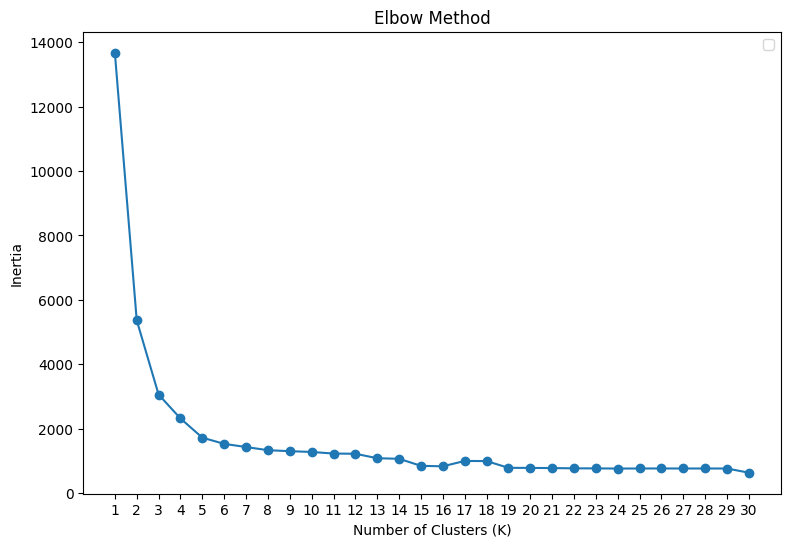

In [17]:
# Apply Elbow method to find optimal cluster number
elbow_method(candidates_data, max_clusters=30)

# iteration : 1
centroids : [ 36.37342808 128.18047953] [ 37.55716612 127.05675826] [ 37.62126403 126.68575495] 
new centroids : [ 35.70856974 128.0806352 ] [ 37.47354806 127.13973717] [ 37.44498407 126.7134364 ] 
centroid difference : 0.7054954792794162
# iteration : 2
centroids : [ 35.70856974 128.0806352 ] [ 37.47354806 127.13973717] [ 37.44498407 126.7134364 ] 
new centroids : [ 35.5510066  128.09848098] [ 37.48661989 127.2831745 ] [ 37.26385672 126.74730167] 
centroid difference : 0.2825663209526844
# iteration : 3
centroids : [ 35.5510066  128.09848098] [ 37.48661989 127.2831745 ] [ 37.26385672 126.74730167] 
new centroids : [ 35.49745287 128.13593471] [ 37.51100359 127.3159144 ] [ 37.15127861 126.81608143] 
centroid difference : 0.15278002246779762
# iteration : 4
centroids : [ 35.49745287 128.13593471] [ 37.51100359 127.3159144 ] [ 37.15127861 126.81608143] 
new centroids : [ 35.45226157 128.1858994 ] [ 37.55322483 127.298165  ] [ 37.00247213 126.89328558] 
centroid difference 

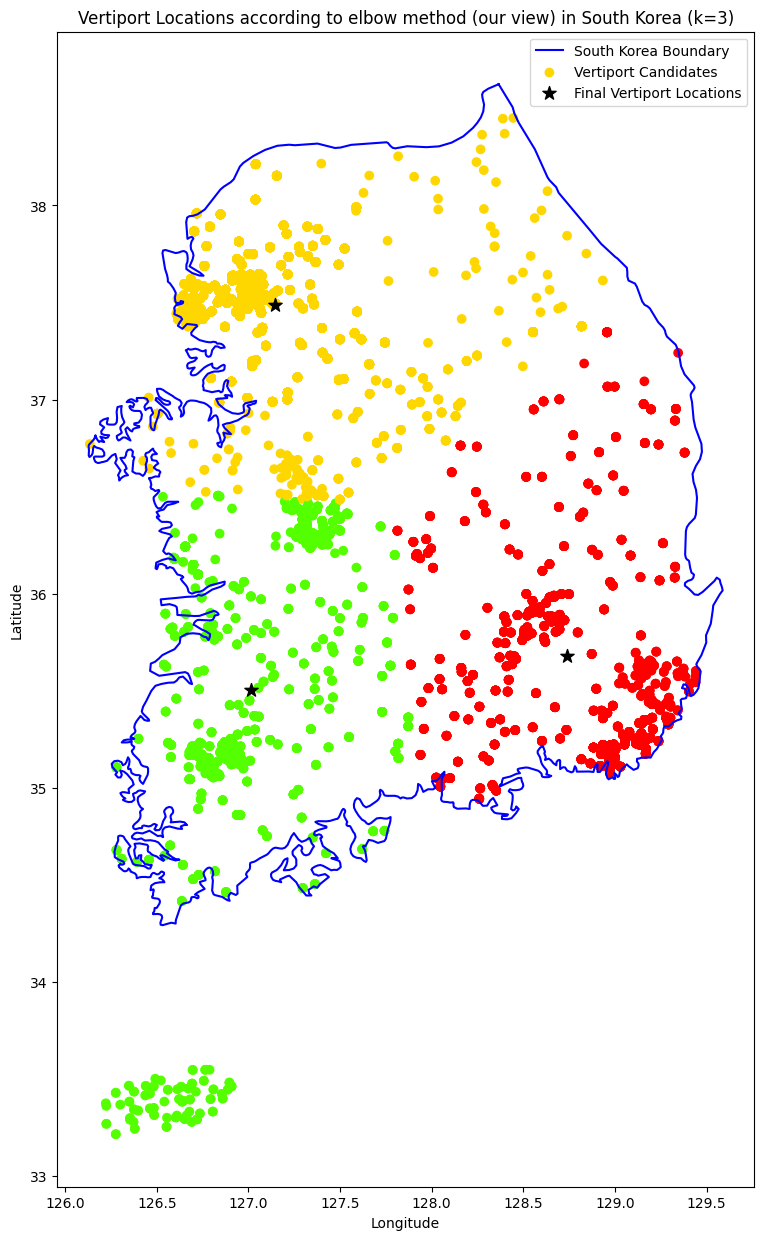

In [18]:
# number of clustering according to the elbow method (our view)
k = 3

# Prepare the vertiport candidate data for clustering
candidates_data = np.column_stack((latitude_candidates, longitude_candidates))
initial_centroids = candidates_data[np.random.choice(range(len(candidates_data)), size=k, replace=False)]

# Perform K-Means clustering using the k_means_clustering function
cluster_assignments, centroid_points = k_means_clustering(candidates_data, initial_centroids)

# Visualize the territory boundary, vertiport candidate locations, and centroid points
plt.figure(figsize=(9, 15))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary') # Plot the territory
plt.scatter(longitude_candidates, latitude_candidates, c=cluster_assignments, cmap='prism', marker='o', label='Vertiport Candidates') # Plot the sample points
plt.scatter(centroid_points[:, 1], centroid_points[:, 0], c='black', marker='*', s=100, label='Final Vertiport Locations') # Plot the centriods
plt.title('Vertiport Locations according to elbow method (our view) in South Korea (k={})'.format(k))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### 2. What if we initialize the initial centroids as the representative coordinates of each city/district in Korea?

#### 2-1 : Cities and provinces

In [19]:
koreaRootAddress = {
    '서울': [37.56356944444444, 126.98000833333333],
    '경기': [37.567167, 127.190292],
    '제주': [33.48569444444445, 126.50033333333333],
    '전남': [34.813044444444444, 126.465],
    '전북': [35.81727, 127.11105277777777],
    '광주': [35.156974999999996, 126.85336388888888],
    '경남': [35.23473611111111, 128.69416666666666],
    '경북': [35.889605555555555, 128.60276666666667],
    '울산': [35.53540833333333, 129.3136888888889],
    '대구': [35.868541666666665, 128.60355277777776],
    '부산': [35.17701944444444, 129.07695277777776],
    '충남': [36.32387222222223, 127.42295555555556],
    '충북': [36.6325, 127.49358611111111],
    '세종': [36.4800121, 127.2890691],
    '대전': [36.347119444444445, 127.38656666666667],
    '인천': [37.45323333333334, 126.70735277777779],
    '강원': [37.555837, 128.209315]
}

cities = np.array(list(koreaRootAddress.values()))

In [20]:
len(cities)

17

# iteration : 1
centroids : [ 37.56356944 126.98000833] [ 37.567167 127.190292] [ 33.48569444 126.50033333] [ 34.81304444 126.465     ] [ 35.81727    127.11105278] [ 35.156975   126.85336389] [ 35.23473611 128.69416667] [ 35.88960556 128.60276667] [ 35.53540833 129.31368889] [ 35.86854167 128.60355278] [ 35.17701944 129.07695278] [ 36.32387222 127.42295556] [ 36.6325     127.49358611] [ 36.4800121 127.2890691] [ 36.34711944 127.38656667] [ 37.45323333 126.70735278] [ 37.555837 128.209315] 
new centroids : [ 37.59443033 126.96899166] [ 37.59540347 127.31432093] [ 33.3874641  126.58561935] [ 34.68039624 126.55857067] [ 35.93523538 126.94463338] [ 35.13010545 126.93283022] [ 35.23555562 128.32874903] [ 36.19530862 128.69736953] [ 35.57303958 129.23814615] [ 35.71507576 128.42654125] [ 35.22862429 129.05121904] [ 36.22118224 127.65740392] [ 36.94363996 127.56686202] [ 36.53912247 127.15474147] [ 36.33229314 127.34042644] [ 37.36943517 126.72823531] [ 37.29544923 128.5013356 ] 
centroid dif

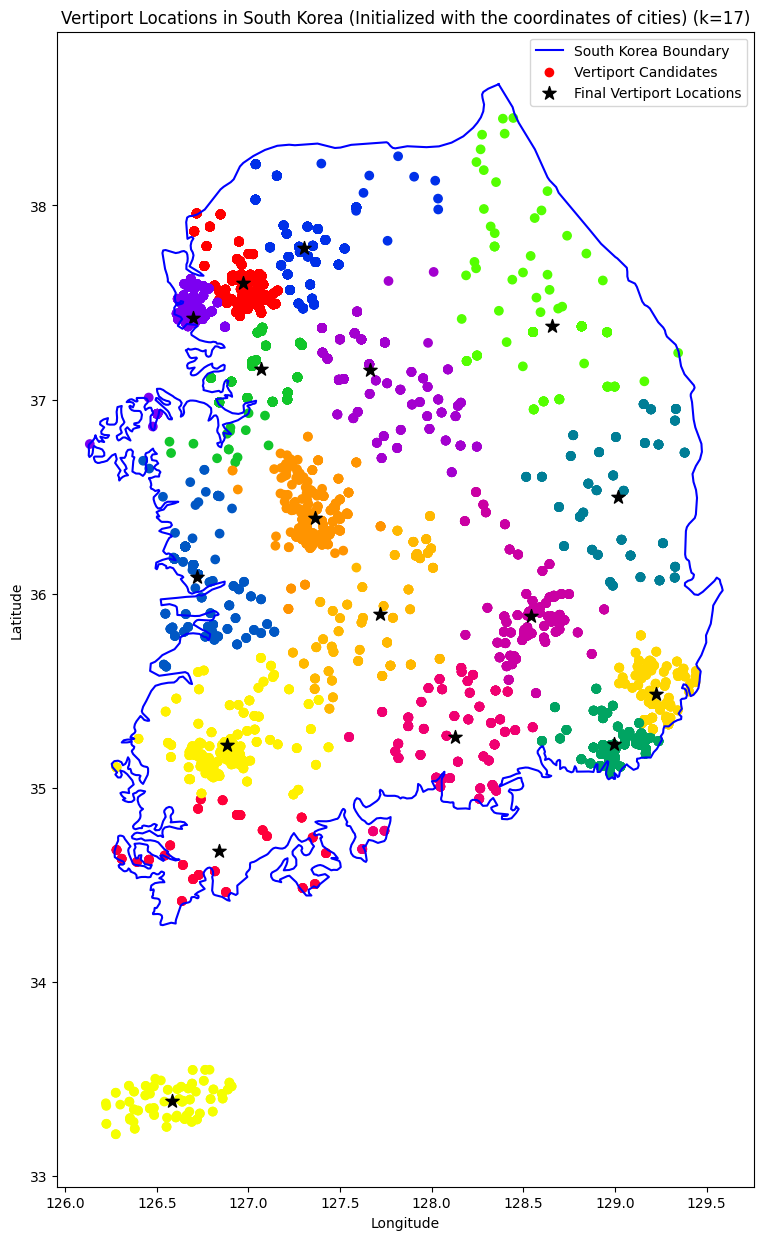

In [29]:
# Prepare the initial centroids for clustering with the representative coordinates of Cities of Korea
initial_centroids = cities

# Prepare the vertiport candidate data for clustering
candidates_data = np.column_stack((latitude_candidates, longitude_candidates))

# Set k to the number of cities in Korea
k = len(cities)

# Perform K-Means clustering using the k_means_clustering function
cluster_assignments, centroid_points = k_means_clustering(candidates_data, initial_centroids)

# Visualize the territory boundary, vertiport candidate locations, and centroid points
plt.figure(figsize=(9, 15))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary') # Plot the territory 
plt.scatter(longitude_candidates, latitude_candidates, c=cluster_assignments, cmap='prism', marker='o', label='Vertiport Candidates') # Plot the sample points
plt.scatter(centroid_points[:, 1], centroid_points[:, 0], c='black', marker='*', s=100, label='Final Vertiport Locations') # Plot the centriods
plt.title('Vertiport Locations in South Korea (Initialized with the coordinates of cities) (k={})'.format(k))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### 2-2 : Districts

In [22]:
districts ={
    "서울특별시/강남구": {
        "lat": "37.4951",
        "long": "127.06278"
    },
    "서울특별시/강동구": {
        "lat": "37.55274",
        "long": "127.14546"
    },
    "서울특별시/강북구": {
        "lat": "37.6349",
        "long": "127.02015"
    },
    "서울특별시/강서구": {
        "lat": "37.56227",
        "long": "126.81622"
    },
    "서울특별시/관악구": {
        "lat": "37.47876",
        "long": "126.95235"
    },
    "서울특별시/광진구": {
        "lat": "37.53913",
        "long": "127.08366"
    },
    "서울특별시/구로구": {
        "lat": "37.49447",
        "long": "126.8502"
    },
    "서울특별시/금천구": {
        "lat": "37.47486",
        "long": "126.89106"
    },
    "서울특별시/노원구": {
        "lat": "37.66045",
        "long": "127.06718"
    },
    "서울특별시/도봉구": {
        "lat": "37.65066",
        "long": "127.03011"
    },
    "서울특별시/동대문구": {
        "lat": "37.58189",
        "long": "127.05408"
    },
    "서울특별시/동작구": {
        "lat": "37.50056",
        "long": "126.95149"
    },
    "서울특별시/마포구": {
        "lat": "37.55438",
        "long": "126.90926"
    },
    "서울특별시/서대문구": {
        "lat": "37.57809",
        "long": "126.93506"
    },
    "서울특별시/서초구": {
        "lat": "37.49447",
        "long": "127.01088"
    },
    "서울특별시/성동구": {
        "lat": "37.54784",
        "long": "127.02461"
    },
    "서울특별시/성북구": {
        "lat": "37.60267",
        "long": "127.01448"
    },
    "서울특별시/송파구": {
        "lat": "37.5021",
        "long": "127.11113"
    },
    "서울특별시/양천구": {
        "lat": "37.52056",
        "long": "126.87472"
    },
    "서울특별시/영등포구": {
        "lat": "37.52606",
        "long": "126.90308"
    },
    "서울특별시/용산구": {
        "lat": "37.53391",
        "long": "126.9775"
    },
    "서울특별시/은평구": {
        "lat": "37.61846",
        "long": "126.9278"
    },
    "서울특별시/종로구": {
        "lat": "37.5729",
        "long": "126.97928"
    },
    "서울특별시/중구": {
        "lat": "37.55986",
        "long": "126.99398"
    },
    "서울특별시/중랑구": {
        "lat": "37.60199",
        "long": "127.10461"
    },
    "부산광역시/강서구": {
        "lat": "35.1593",
        "long": "128.933"
    },
    "부산광역시/금정구": {
        "lat": "35.25863",
        "long": "129.0901"
    },
    "부산광역시/기장군": {
        "lat": "35.29721",
        "long": "129.20076"
    },
    "부산광역시/남구": {
        "lat": "35.13648",
        "long": "129.08266"
    },
    "부산광역시/동구": {
        "lat": "35.12468",
        "long": "129.03432"
    },
    "부산광역시/동래구": {
        "lat": "35.20447",
        "long": "129.078"
    },
    "부산광역시/부산진구": {
        "lat": "35.16293",
        "long": "129.05133"
    },
    "부산광역시/북구": {
        "lat": "35.19724",
        "long": "128.99134"
    },
    "부산광역시/사상구": {
        "lat": "35.14479",
        "long": "128.97986"
    },
    "부산광역시/사하구": {
        "lat": "35.08552",
        "long": "128.98725"
    },
    "부산광역시/서구": {
        "lat": "35.12529",
        "long": "129.01946"
    },
    "부산광역시/수영구": {
        "lat": "35.15627",
        "long": "129.11253"
    },
    "부산광역시/연제구": {
        "lat": "35.18206",
        "long": "129.08285"
    },
    "부산광역시/영도구": {
        "lat": "35.07849",
        "long": "129.06483"
    },
    "부산광역시/중구": {
        "lat": "35.10594",
        "long": "129.03331"
    },
    "부산광역시/해운대구": {
        "lat": "35.16665",
        "long": "129.16792"
    },
    "인천광역시/강화군": {
        "lat": "37.74722",
        "long": "126.48556"
    },
    "인천광역시/계양구": {
        "lat": "37.52306",
        "long": "126.74472"
    },
    "인천광역시/남구": {
        "lat": "37.46362",
        "long": "126.65"
    },
    "인천광역시/남동구": {
        "lat": "37.41831",
        "long": "126.7184"
    },
    "인천광역시/동구": {
        "lat": "37.48375",
        "long": "126.6369"
    },
    "인천광역시/부평구": {
        "lat": "37.4972",
        "long": "126.71107"
    },
    "인천광역시/서구": {
        "lat": "37.55233",
        "long": "126.65543"
    },
    "인천광역시/연수구": {
        "lat": "37.41911",
        "long": "126.66489"
    },
    "인천광역시/옹진군": {
        "lat": "37.23361",
        "long": "126.12305"
    },
    "인천광역시/중구": {
        "lat": "37.47353",
        "long": "126.62151"
    },
    "대구광역시/중구": {
        "lat": "35.86678",
        "long": "128.59538"
    },
    "대구광역시/동구": {
        "lat": "35.88566",
        "long": "128.63296"
    },
    "대구광역시/서구": {
        "lat": "35.87465",
        "long": "128.55109"
    },
    "대구광역시/남구": {
        "lat": "35.84119",
        "long": "128.588"
    },
    "대구광역시/북구": {
        "lat": "35.9",
        "long": "128.59175"
    },
    "대구광역시/수성구": {
        "lat": "35.85905",
        "long": "128.62625"
    },
    "대구광역시/달서구": {
        "lat": "35.82569",
        "long": "128.52403"
    },
    "대구광역시/달성군": {
        "lat": "35.77467",
        "long": "128.42955"
    },
    "광주광역시/동구": {
        "lat": "35.14592",
        "long": "126.9232"
    },
    "광주광역시/서구": {
        "lat": "35.15248",
        "long": "126.89106"
    },
    "광주광역시/남구": {
        "lat": "35.12159",
        "long": "126.90943"
    },
    "광주광역시/북구": {
        "lat": "35.19232",
        "long": "126.92439"
    },
    "광주광역시/광산구": {
        "lat": "35.16158",
        "long": "126.8081"
    },
    "대전광역시/동구": {
        "lat": "36.32938",
        "long": "127.44313"
    },
    "대전광역시/중구": {
        "lat": "36.28044",
        "long": "127.41093"
    },
    "대전광역시/서구": {
        "lat": "36.28071",
        "long": "127.34533"
    },
    "대전광역시/유성구": {
        "lat": "36.36685",
        "long": "127.327"
    },
    "대전광역시/대덕구": {
        "lat": "36.39591",
        "long": "127.43437"
    },
    "울산광역시/중구": {
        "lat": "35.5684",
        "long": "129.33226"
    },
    "울산광역시/남구": {
        "lat": "35.54382",
        "long": "129.32917"
    },
    "울산광역시/동구": {
        "lat": "35.5047",
        "long": "129.4186"
    },
    "울산광역시/북구": {
        "lat": "35.58243",
        "long": "129.36049"
    },
    "울산광역시/울주군": {
        "lat": "35.56233",
        "long": "129.1269"
    },
    "경기도/가평군": {
        "lat": "37.8308",
        "long": "127.51522"
    },
    "경기도/고양시": {
        "lat": "37.65639",
        "long": "126.835"
    },
    "경기도/과천시": {
        "lat": "37.43407",
        "long": "126.99989"
    },
    "경기도/광명시": {
        "lat": "37.44435",
        "long": "126.86499"
    },
    "경기도/광주시": {
        "lat": "35.16667",
        "long": "126.91667"
    },
    "경기도/구리시": {
        "lat": "37.5986",
        "long": "127.1394"
    },
    "경기도/군포시": {
        "lat": "37.34261",
        "long": "126.92149"
    },
    "경기도/김포시": {
        "lat": "37.59417",
        "long": "126.7425"
    },
    "경기도/남양주시": {
        "lat": "37.65217",
        "long": "127.2401"
    },
    "경기도/동두천시": {
        "lat": "37.91889",
        "long": "127.06897"
    },
    "경기도/부천시": {
        "lat": "37.49889",
        "long": "126.78306"
    },
    "경기도/성남시": {
        "lat": "37.41875",
        "long": "127.12877"
    },
    "경기도/수원시": {
        "lat": "37.28586",
        "long": "127.00993"
    },
    "경기도/시흥시": {
        "lat": "37.39067",
        "long": "126.7888"
    },
    "경기도/안산시": {
        "lat": "37.31693",
        "long": "126.83048"
    },
    "경기도/안성시": {
        "lat": "37.03789",
        "long": "127.30057"
    },
    "경기도/안양시": {
        "lat": "37.3925",
        "long": "126.92694"
    },
    "경기도/양주시": {
        "lat": "37.81732",
        "long": "127.046"
    },
    "경기도/양평군": {
        "lat": "37.4888",
        "long": "127.49222"
    },
    "경기도/여주시": {
        "lat": "37.29562",
        "long": "127.63668"
    },
    "경기도/연천군": {
        "lat": "38.09404",
        "long": "127.07577"
    },
    "경기도/오산시": {
        "lat": "37.15222",
        "long": "127.07056"
    },
    "경기도/용인시": {
        "lat": "37.23825",
        "long": "127.17795"
    },
    "경기도/의왕시": {
        "lat": "37.345",
        "long": "126.97575"
    },
    "경기도/의정부시": {
        "lat": "37.73865",
        "long": "127.0477"
    },
    "경기도/이천시": {
        "lat": "37.27917",
        "long": "127.4425"
    },
    "경기도/파주시": {
        "lat": "37.75952",
        "long": "126.77772"
    },
    "경기도/평택시": {
        "lat": "36.99472",
        "long": "127.08889"
    },
    "경기도/포천시": {
        "lat": "37.8937",
        "long": "127.20028"
    },
    "경기도/하남시": {
        "lat": "37.53895",
        "long": "127.2125"
    },
    "경기도/화성시": {
        "lat": "37.20025",
        "long": "126.82909"
    },
    "강원도/원주시": {
        "lat": "37.32104",
        "long": "127.92132"
    },
    "강원도/춘천시": {
        "lat": "37.88048",
        "long": "127.72776"
    },
    "강원도/강릉시": {
        "lat": "37.7519",
        "long": "128.87825"
    },
    "강원도/동해시": {
        "lat": "37.52345",
        "long": "129.11357"
    },
    "강원도/속초시": {
        "lat": "38.20725",
        "long": "128.59275"
    },
    "강원도/삼척시": {
        "lat": "37.45013",
        "long": "129.16626"
    },
    "강원도/홍천군": {
        "lat": "37.6918",
        "long": "127.8857"
    },
    "강원도/태백시": {
        "lat": "37.1652",
        "long": "128.9857"
    },
    "강원도/철원군": {
        "lat": "38.24391",
        "long": "127.44522"
    },
    "강원도/횡성군": {
        "lat": "37.48817",
        "long": "127.9857"
    },
    "강원도/평창군": {
        "lat": "37.37028",
        "long": "128.39306"
    },
    "강원도/영월군": {
        "lat": "37.1833",
        "long": "128.4615"
    },
    "강원도/정선군": {
        "lat": "37.38911",
        "long": "128.72995"
    },
    "강원도/인제군": {
        "lat": "38.04416",
        "long": "128.27876"
    },
    "강원도/고성군": {
        "lat": "38.37945",
        "long": "128.46755"
    },
    "강원도/양양군": {
        "lat": "38.06215",
        "long": "128.61471"
    },
    "강원도/화천군": {
        "lat": "38.14212",
        "long": "127.67615"
    },
    "강원도/양구군": {
        "lat": "38.10583",
        "long": "127.98944"
    },
    "충청북도/청주시": {
        "lat": "36.63722",
        "long": "127.48972"
    },
    "충청북도/충주시": {
        "lat": "37.01791",
        "long": "127.87713"
    },
    "충청북도/제천시": {
        "lat": "37.06206",
        "long": "128.14065"
    },
    "충청북도/보은군": {
        "lat": "36.49489",
        "long": "127.72865"
    },
    "충청북도/옥천군": {
        "lat": "36.3012",
        "long": "127.568"
    },
    "충청북도/영동군": {
        "lat": "36.1645",
        "long": "127.79018"
    },
    "충청북도/증평군": {
        "lat": "36.78377",
        "long": "127.59858"
    },
    "충청북도/진천군": {
        "lat": "36.85667",
        "long": "127.44333"
    },
    "충청북도/괴산군": {
        "lat": "36.77179",
        "long": "127.81426"
    },
    "충청북도/음성군": {
        "lat": "36.92602",
        "long": "127.6807"
    },
    "충청북도/단양군": {
        "lat": "36.98615",
        "long": "128.36945"
    },
    "충청남도/천안시": {
        "lat": "36.80488",
        "long": "127.19431"
    },
    "충청남도/공주시": {
        "lat": "36.45556",
        "long": "127.12472"
    },
    "충청남도/보령시": {
        "lat": "36.35649",
        "long": "126.59444"
    },
    "충청남도/아산시": {
        "lat": "36.78361",
        "long": "127.00417"
    },
    "충청남도/서산시": {
        "lat": "36.78518",
        "long": "126.46568"
    },
    "충청남도/논산시": {
        "lat": "36.19774",
        "long": "127.12143"
    },
    "충청남도/계룡시": {
        "lat": "36.29304",
        "long": "127.22575"
    },
    "충청남도/당진시": {
        "lat": "36.91667",
        "long": "126.66667"
    },
    "충청남도/금산군": {
        "lat": "36.13381",
        "long": "127.48062"
    },
    "충청남도/부여군": {
        "lat": "36.26257",
        "long": "126.85802"
    },
    "충청남도/서천군": {
        "lat": "36.1082",
        "long": "126.69722"
    },
    "충청남도/청양군": {
        "lat": "36.44586",
        "long": "126.84288"
    },
    "충청남도/홍성군": {
        "lat": "36.56705",
        "long": "126.62626"
    },
    "충청남도/예산군": {
        "lat": "36.68218",
        "long": "126.79592"
    },
    "충청남도/태안군": {
        "lat": "36.70036",
        "long": "126.28391"
    },
    "경상북도/포항시": {
        "lat": "36.08333",
        "long": "129.36667"
    },
    "경상북도/경주시": {
        "lat": "35.84278",
        "long": "129.21167"
    },
    "경상북도/김천시": {
        "lat": "36.14481",
        "long": "128.11157"
    },
    "경상북도/안동시": {
        "lat": "36.56636",
        "long": "128.72275"
    },
    "경상북도/구미시": {
        "lat": "36.21009",
        "long": "128.35442"
    },
    "경상북도/영주시": {
        "lat": "36.87459",
        "long": "128.58631"
    },
    "경상북도/영천시": {
        "lat": "36",
        "long": "129"
    },
    "경상북도/상주시": {
        "lat": "36.41667",
        "long": "128.16667"
    },
    "경상북도/문경시": {
        "lat": "36.59458",
        "long": "128.19946"
    },
    "경상북도/경산시": {
        "lat": "35.83333",
        "long": "128.8"
    },
    "경상북도/군위군": {
        "lat": "36.16995",
        "long": "128.64705"
    },
    "경상북도/의성군": {
        "lat": "36.36122",
        "long": "128.61517"
    },
    "경상북도/청송군": {
        "lat": "36.43288",
        "long": "129.05159"
    },
    "경상북도/영양군": {
        "lat": "36.69592",
        "long": "129.14196"
    },
    "경상북도/영덕군": {
        "lat": "36.48125",
        "long": "129.31078"
    },
    "경상북도/청도군": {
        "lat": "35.67166",
        "long": "128.78509"
    },
    "경상북도/고령군": {
        "lat": "35.74959",
        "long": "128.29707"
    },
    "경상북도/성주군": {
        "lat": "35.91888",
        "long": "128.28838"
    },
    "경상북도/칠곡군": {
        "lat": "36.01512",
        "long": "128.46138"
    },
    "경상북도/예천군": {
        "lat": "36.65272",
        "long": "128.43007"
    },
    "경상북도/봉화군": {
        "lat": "36.88951",
        "long": "128.73573"
    },
    "경상북도/울진군": {
        "lat": "36.91968",
        "long": "129.31966"
    },
    "경상북도/울릉군": {
        "lat": "37.50442",
        "long": "130.86084"
    },
    "경상남도/창원시": {
        "lat": "35.27533",
        "long": "128.65152"
    },
    "경상남도/김해시": {
        "lat": "35.25",
        "long": "128.86667"
    },
    "경상남도/진주시": {
        "lat": "35.20445",
        "long": "128.12408"
    },
    "경상남도/양산시": {
        "lat": "35.39866",
        "long": "129.03612"
    },
    "경상남도/거제시": {
        "lat": "34.9",
        "long": "128.66666"
    },
    "경상남도/통영시": {
        "lat": "34.8736",
        "long": "128.39709"
    },
    "경상남도/사천시": {
        "lat": "35.00385",
        "long": "128.06857"
    },
    "경상남도/밀양시": {
        "lat": "35.49333",
        "long": "128.74889"
    },
    "경상남도/함안군": {
        "lat": "35.29117",
        "long": "128.4297"
    },
    "경상남도/거창군": {
        "lat": "35.68735",
        "long": "127.91142"
    },
    "경상남도/창녕군": {
        "lat": "35.50822",
        "long": "128.4902"
    },
    "경상남도/고성군": {
        "lat": "35.01478",
        "long": "128.28244"
    },
    "경상남도/하동군": {
        "lat": "35.13628",
        "long": "127.77291"
    },
    "경상남도/합천군": {
        "lat": "35.5741",
        "long": "128.13841"
    },
    "경상남도/남해군": {
        "lat": "34.80433",
        "long": "127.92708"
    },
    "경상남도/함양군": {
        "lat": "35.55233",
        "long": "127.71196"
    },
    "경상남도/산청군": {
        "lat": "35.36625",
        "long": "127.87065"
    },
    "경상남도/의령군": {
        "lat": "35.3923",
        "long": "128.26917"
    },
    "전라북도/전주시": {
        "lat": "35.82194",
        "long": "127.14889"
    },
    "전라북도/익산시": {
        "lat": "35.94389",
        "long": "126.95444"
    },
    "전라북도/군산시": {
        "lat": "35.93583",
        "long": "126.68338"
    },
    "전라북도/정읍시": {
        "lat": "35.6",
        "long": "126.91667"
    },
    "전라북도/완주군": {
        "lat": "35.84509",
        "long": "127.14752"
    },
    "전라북도/김제시": {
        "lat": "35.80701",
        "long": "126.90755"
    },
    "전라북도/남원시": {
        "lat": "35.42966",
        "long": "127.43208"
    },
    "전라북도/고창군": {
        "lat": "35.43483",
        "long": "126.70047"
    },
    "전라북도/부안군": {
        "lat": "35.7",
        "long": "126.66667"
    },
    "전라북도/임실군": {
        "lat": "35.6066",
        "long": "127.2301"
    },
    "전라북도/순창군": {
        "lat": "35.41667",
        "long": "127.16667"
    },
    "전라북도/진안군": {
        "lat": "35.8216",
        "long": "127.41183"
    },
    "전라북도/장수군": {
        "lat": "35.66667",
        "long": "127.53333"
    },
    "전라북도/무주군": {
        "lat": "35.93172",
        "long": "127.71118"
    },
    "전라남도/여수시": {
        "lat": "34.77647",
        "long": "127.64253"
    },
    "전라남도/순천시": {
        "lat": "34.98951",
        "long": "127.39551"
    },
    "전라남도/목포시": {
        "lat": "34.80826",
        "long": "126.3942"
    },
    "전라남도/광양시": {
        "lat": "35.02926",
        "long": "127.64882"
    },
    "전라남도/나주시": {
        "lat": "35.05683",
        "long": "126.67362"
    },
    "전라남도/무안군": {
        "lat": "34.95642",
        "long": "126.44041"
    },
    "전라남도/해남군": {
        "lat": "34.54047",
        "long": "126.5187"
    },
    "전라남도/고흥군": {
        "lat": "34.58333",
        "long": "127.33333"
    },
    "전라남도/화순군": {
        "lat": "35.00843",
        "long": "127.02576"
    },
    "전라남도/영암군": {
        "lat": "34.7979",
        "long": "126.62651"
    },
    "전라남도/영광군": {
        "lat": "35.28711",
        "long": "126.43616"
    },
    "전라남도/완도군": {
        "lat": "34.31182",
        "long": "126.73845"
    },
    "전라남도/담양군": {
        "lat": "35.33976",
        "long": "126.99125"
    },
    "전라남도/장성군": {
        "lat": "35.32734",
        "long": "126.76817"
    },
    "전라남도/보성군": {
        "lat": "34.81426",
        "long": "127.15765"
    },
    "전라남도/신안군": {
        "lat": "34.8262",
        "long": "126.10863"
    },
    "전라남도/장흥군": {
        "lat": "34.66667",
        "long": "126.91667"
    },
    "전라남도/강진군": {
        "lat": "34.61787",
        "long": "126.76758"
    },
    "전라남도/함평군": {
        "lat": "35.11641",
        "long": "126.53221"
    },
    "전라남도/진도군": {
        "lat": "34.41018",
        "long": "126.1688"
    },
    "전라남도/곡성군": {
        "lat": "35.21449",
        "long": "127.2628"
    },
    "전라남도/구례군": {
        "lat": "35.20944",
        "long": "127.46444"
    },
    "제주특별자치도/제주시": {
        "lat": "33.50972",
        "long": "126.52194"
    },
    "제주특별자치도/서귀포시": {
        "lat": "33.29307",
        "long": "126.49748"
    }
}

In [23]:
# Extract the dictionary composed of coordinates of each district
district_coordinates = list(districts.values())

# Make a list only composed of values in the extracted dictionary
district = []
for coordinates in district_coordinates:
  lat = float(coordinates['lat'])
  long = float((coordinates['long']))
  district.append([lat,long])

In [24]:
# Filter out the districts and counties that are not included in the defined territory
in_territory = []
x = np.arange(min_lon, max_lon, grid_size)
y = np.arange(min_lat, max_lat, grid_size)

for coordinate in district:
      point = Point(coordinate[1], coordinate[0])
      if polygon.contains(point):
          in_territory.append([coordinate[0], coordinate[1]])

# Add the coordinates of the two cities of Jeju island
jejusi = [33.50972, 126.52194]
seoguiposi = [33.29307, 126.49748]

in_territory.append(jejusi)
in_territory.append(seoguiposi)

district_points = np.array(in_territory)

In [25]:
len(district_points)

217

# iteration : 1
centroids : [ 37.4951  127.06278] [ 37.55274 127.14546] [ 37.6349  127.02015] [ 37.56227 126.81622] [ 37.47876 126.95235] [ 37.53913 127.08366] [ 37.49447 126.8502 ] [ 37.47486 126.89106] [ 37.66045 127.06718] [ 37.65066 127.03011] [ 37.58189 127.05408] [ 37.50056 126.95149] [ 37.55438 126.90926] [ 37.57809 126.93506] [ 37.49447 127.01088] [ 37.54784 127.02461] [ 37.60267 127.01448] [ 37.5021  127.11113] [ 37.52056 126.87472] [ 37.52606 126.90308] [ 37.53391 126.9775 ] [ 37.61846 126.9278 ] [ 37.5729  126.97928] [ 37.55986 126.99398] [ 37.60199 127.10461] [ 35.1593 128.933 ] [ 35.25863 129.0901 ] [ 35.29721 129.20076] [ 35.13648 129.08266] [ 35.12468 129.03432] [ 35.20447 129.078  ] [ 35.16293 129.05133] [ 35.19724 128.99134] [ 35.14479 128.97986] [ 35.08552 128.98725] [ 35.12529 129.01946] [ 35.15627 129.11253] [ 35.18206 129.08285] [ 35.10594 129.03331] [ 35.16665 129.16792] [ 37.52306 126.74472] [ 37.46362 126.65   ] [ 37.41831 126.7184 ] [ 37.48375 126.6369 ] [ 37.4

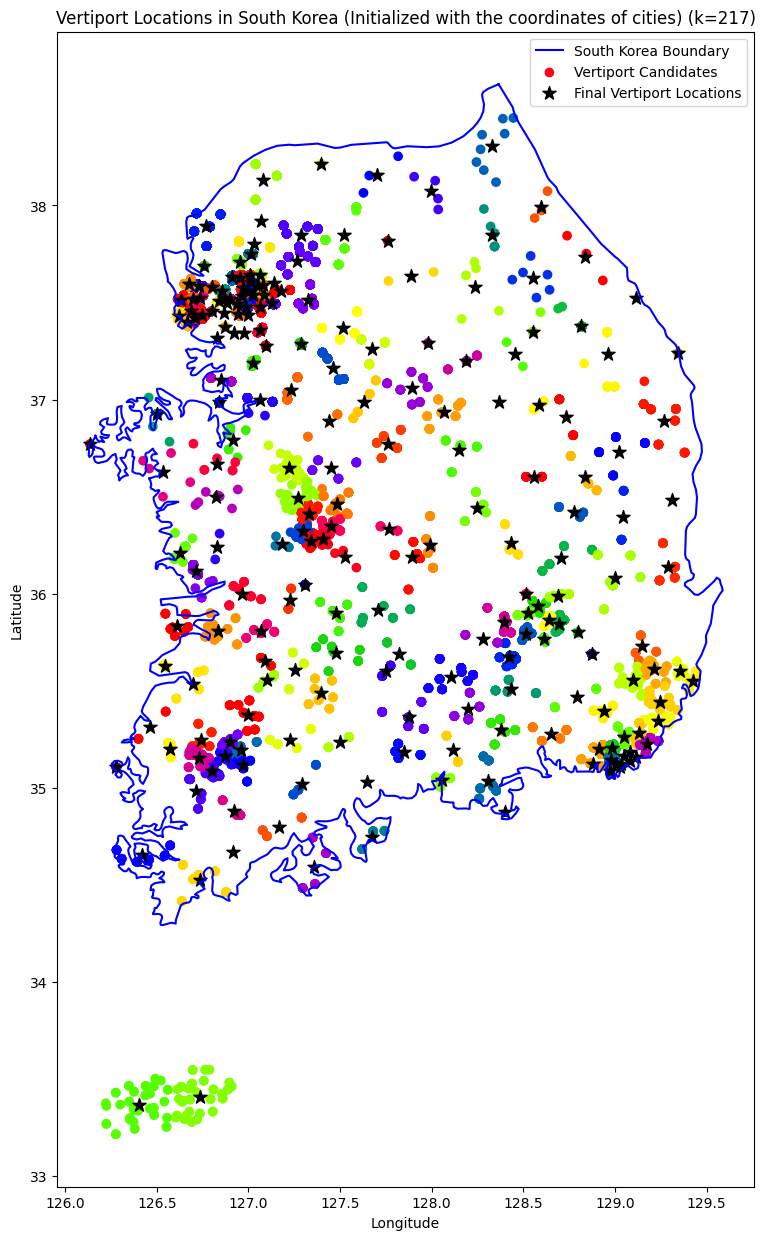

In [26]:
# Prepare the initial centroids for clustering with the representative coordinates of districts of Korea
initial_centroids = district

# Prepare the vertiport candidate data for clustering
candidates_data = np.column_stack((latitude_candidates, longitude_candidates))

# Set k to the number of districts in Korea
k = len(district_points)

# Perform K-Means clustering using the k_means_clustering function
cluster_assignments, centroid_points = k_means_clustering(candidates_data, district_points)

# Visualize the territory boundary, vertiport candidate locations, and centroid points
plt.figure(figsize=(9, 15))
plt.plot(longitude, latitude, c='blue', label='South Korea Boundary') # Plot the territory
plt.scatter(longitude_candidates, latitude_candidates, c=cluster_assignments, cmap='prism', marker='o', label='Vertiport Candidates') # Plot the sample points
plt.scatter(centroid_points[:, 1], centroid_points[:, 0], c='black', marker='*', s=100, label='Final Vertiport Locations') # Plot the centriods
plt.title('Vertiport Locations in South Korea (Initialized with the coordinates of cities) (k={})'.format(k))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

---

**Citation**

1. Chat GPT
2. [Centroid initialization](https://lovit.github.io/nlp/machine%20learning/2018/03/19/kmeans_initializer/)
3. [Coordinates of Korean Cities, Counties and Districts](https://gist.github.com/hmmhmmhm/b3a950e84f865f8abbd00fa460aa4613)
